In [24]:
import pandas as pd
import numpy as np
import cv2  
from tqdm import tqdm
import os

In [25]:
df = pd.read_csv('Contextual Features/P2_csv.csv')
df.head()

,Name,Time,Human_Activity,Luminosity,Terrain,Presence_of_building,Mechanical_Activity,Nearby_vegetation,Safety
0,20251015_143014,Afternoon,0,Daylight,Road,0,0,Medium,High
1,20251015_143015,Afternoon,0,Daylight,Road,0,0,Medium,High
2,20251015_143017,Afternoon,0,Daylight,Road,0,0,Medium,High
3,20251015_143018,Afternoon,0,Daylight,Road,0,0,Medium,High
4,20251015_143019,Afternoon,0,Daylight,Road,0,0,Medium,High


In [26]:
df['Name']

0      20251015_143014
1      20251015_143015
2      20251015_143017
3      20251015_143018
4      20251015_143019
            ...       
400    20251031_125753
401    20251031_125756
402    20251031_125806
403    20251031_125842
404    20251031_125917
Name: Name, Length: 405, dtype: object

In [27]:
P2_df = df.sort_values(by=['Name'])

P2_df = P2_df.reset_index(drop=True)
P2_df.shape

(405, 9)

In [28]:
P1_df = pd.read_excel('Contextual Features/P1_csv.xlsx')
P1_df = P1_df.sort_values(by=['Name'])
P1_df = P1_df.reset_index(drop=True)

P1_df.shape

(434, 9)

In [29]:
P2_df.columns

Index(['Name', 'Time', 'Human_Activity', 'Luminosity', 'Terrain',
       'Presence_of_building', 'Mechanical_Activity', 'Nearby_vegetation',
       'Safety'],
      dtype='object')

In [30]:
P1_df.columns

Index(['Name', 'Time', 'Human_Activity', 'Luminosity', 'Terrain',
       'Presence_of_building', 'Mechanical_Activity', 'Nearby_vegetation',
       'Safety'],
      dtype='object')

In [31]:
join_df = pd.concat([P1_df, P2_df], axis=0)
join_df = join_df.reset_index(drop=True)

join_df['Name'] = join_df['Name'].apply(lambda x: x.split('.')[0] + '.jpg')
join_df.shape

(839, 9)

In [32]:
join_df.Safety.unique()

array(['High', 'Medium', 'Low'], dtype=object)

array([[<Axes: title={'center': 'Human_Activity'}>,
        <Axes: title={'center': 'Presence_of_building'}>],
       [<Axes: title={'center': 'Mechanical_Activity'}>, <Axes: >]],
      dtype=object)

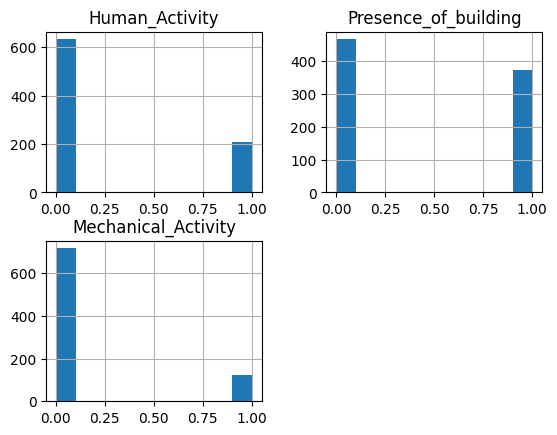

In [33]:
join_df.hist()

<Axes: >

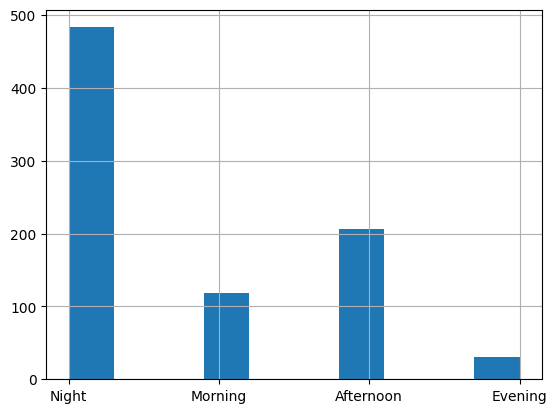

In [34]:
join_df.Time.hist()

<Axes: >

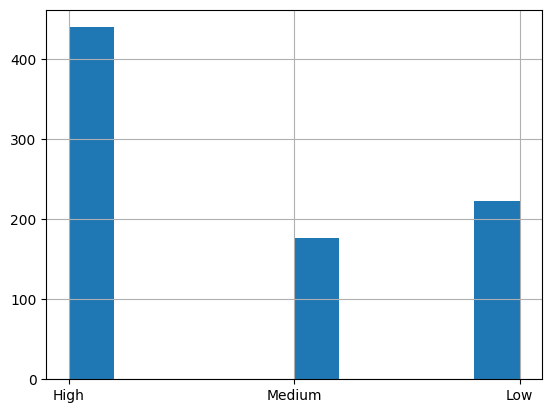

In [35]:
join_df.Safety.hist()

<Axes: >

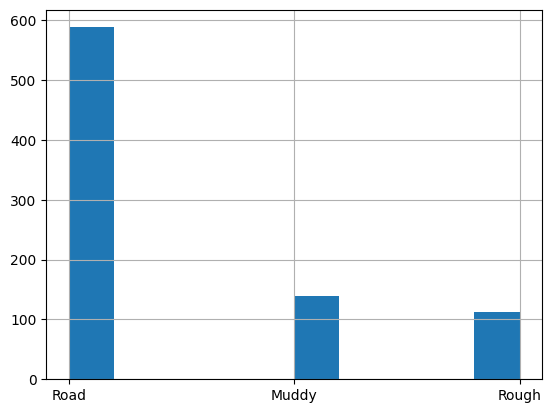

In [36]:
join_df.Terrain.hist()

<Axes: >

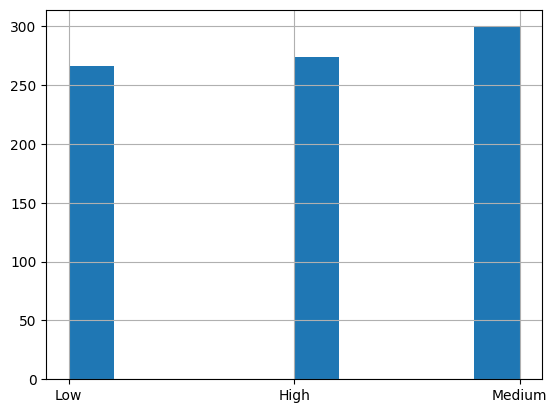

In [37]:
join_df.Nearby_vegetation.hist()

In [38]:
join_df.to_csv('Contextual Features/Final_csv.csv', index=False)

In [39]:
Final_df = pd.read_csv('Contextual Features/Final_Dataset.csv')
Final_df.head()

,Name,Time,Human_Activity,Luminosity,Terrain,Presence_of_building,Mechanical_Activity,Nearby_vegetation,Safety
0,IMG_1854.jpg,Night,0,Well_Lit,Road,0,0,Low,High
1,IMG_1855.jpg,Night,0,Well_Lit,Road,0,0,Low,High
2,IMG_1856.jpg,Morning,0,Daylight,Road,1,0,Low,High
3,IMG_1857.jpg,Afternoon,0,Daylight,Road,1,0,Low,High
4,IMG_1858.jpg,Afternoon,0,Daylight,Muddy,0,0,High,Medium


In [40]:
Final_df.shape

(930, 9)

array([[<Axes: title={'center': 'Human_Activity'}>,
        <Axes: title={'center': 'Presence_of_building'}>],
       [<Axes: title={'center': 'Mechanical_Activity'}>, <Axes: >]],
      dtype=object)

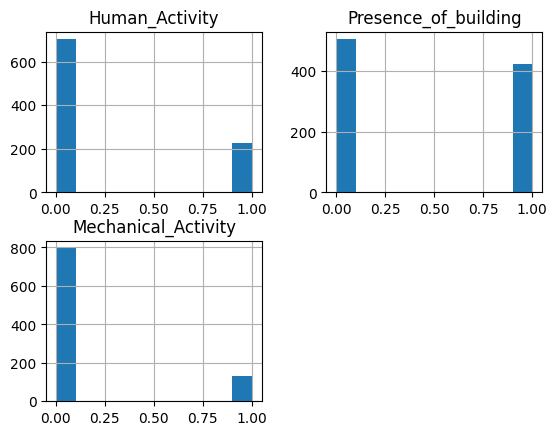

In [41]:
Final_df.hist()

<Axes: >

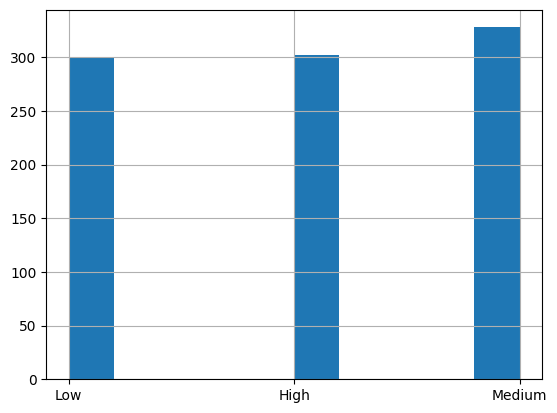

In [42]:
Final_df.Nearby_vegetation.hist()

<Axes: >

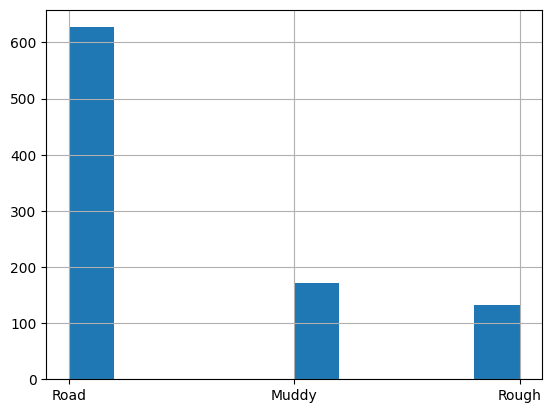

In [43]:
Final_df.Terrain.hist()

<Axes: >

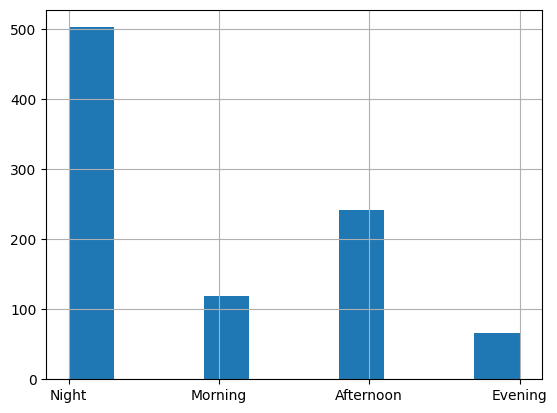

In [44]:
Final_df.Time.hist()

In [45]:
mapping = {
    "High": "Safe",
    "Medium": "Risky",
    "Low": "Dangerous"
}

Final_df["Safety"] = Final_df["Safety"].map(mapping)


<Axes: >

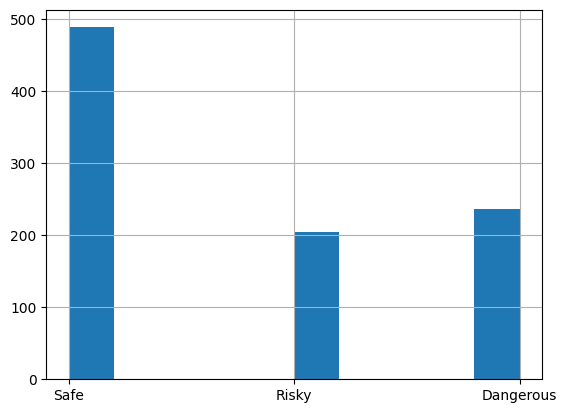

In [46]:
Final_df.Safety.hist()

## Removal of Unnecessary images

In [49]:

csv_path = "Contextual Features/Final_Dataset.csv"          # path to CSV
image_folder = "E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Image_Data"        # folder containing images
column_name = "Name"           # column with full filenames



df = pd.read_csv(csv_path)

# Normalize CSV values: strip whitespace + lowercase
valid_files = set(df[column_name].astype(str).str.strip().str.lower())

# Normalize folder files the same way
folder_files = {f.lower(): f for f in os.listdir(image_folder)}

not_in_csv = [orig for lower, orig in folder_files.items() if lower not in valid_files]

print("Total files:", len(folder_files))
print("Not in CSV:", len(not_in_csv))

print("\nExamples of mismatched files:")
for f in not_in_csv[:20]:
    print(f)



Total files: 957
Not in CSV: 45

Examples of mismatched files:
20251015_143020.jpg
20251015_143125.jpg
20251021_142706.mp4
20251025_232806.jpg
20251025_232819.jpg
20251025_234306.jpg
20251025_234441.jpg
20251025_235141.jpg
20251025_235933.jpg
20251026_000652.jpg
20251026_001453.jpg
20251031_125847.jpg
20251031_125915.jpg
20251031_130005.jpg
20251031_130015.jpg
20251104_172913.jpg
20251104_172917.jpg
20251104_172931.jpg
20251104_172955.jpg
20251104_173000.jpg


In [52]:
# imports are already present earlier in the notebook (avoid re-importing)
csv_path = "Contextual Features/Final_Dataset.csv"          # path to CSV
image_folder = "E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Image_Data"        # folder containing images
column_name = "Name"  

# Load CSV and normalize filenames
df = pd.read_csv(csv_path)
df[column_name] = df[column_name].astype(str).str.strip()

# build mapping from lowercased CSV name -> original CSV name (keeps original casing for output)
df_name_map = {name.lower(): name for name in df[column_name].astype(str)}

csv_files = set(df[column_name].str.lower())

# List image folder contents and normalize filenames
folder_listing = os.listdir(image_folder)
folder_files_lower = {f.lower(): f for f in folder_listing}

# 1. Files in CSV but NOT in folder (use original CSV casing via df_name_map)
missing_in_folder = [df_name_map[f] for f in csv_files if f not in folder_files_lower]

# 2. Files in folder but NOT in CSV
extra_in_folder = [orig for f, orig in folder_files_lower.items() if f not in csv_files]

print("=== SUMMARY ===")
print(f"Rows in CSV: {len(df)}")
print(f"Files in folder: {len(folder_listing)}")
print(f"Missing in folder: {len(missing_in_folder)}")
print(f"Extra in folder: {len(extra_in_folder)}")

print("\nMissing in folder (exist in CSV but not on disk):")
for f in missing_in_folder[:20]:
    print(f)

print("\nExtra in folder (exist on disk but not in CSV):")
for f in extra_in_folder[:20]:
    print(f)


=== SUMMARY ===
Rows in CSV: 930
Files in folder: 957
Missing in folder: 18
Extra in folder: 45

Missing in folder (exist in CSV but not on disk):
IMG_2270.jpg
20251025_232440.jpg
IMG_2179.jpg
20251025_230801.jpg
20251025_234754.jpg
IMG_2070.jpg
IMG_2047.jpg
20251025_232349.jpg
20251025_234126.jpg
IMG_2258.jpg
IMG_2127.jpg
20251104-173029.jpg
20251105-122034.jpg
IMG_1954.jpg
20251025_232425.jpg
IMG_1994.jpg
20251025_234142.jpg
20251025_232809.jpg

Extra in folder (exist on disk but not in CSV):
20251015_143020.jpg
20251015_143125.jpg
20251021_142706.mp4
20251025_232806.jpg
20251025_232819.jpg
20251025_234306.jpg
20251025_234441.jpg
20251025_235141.jpg
20251025_235933.jpg
20251026_000652.jpg
20251026_001453.jpg
20251031_125847.jpg
20251031_125915.jpg
20251031_130005.jpg
20251031_130015.jpg
20251104_172913.jpg
20251104_172917.jpg
20251104_172931.jpg
20251104_172955.jpg
20251104_173000.jpg


In [54]:
valid_csv = Final_df[Final_df['Name'].str.lower().isin(folder_files_lower.keys())]
valid_csv.to_csv("data_cleaned.csv", index=False)

print("CSV cleaned and saved as data_cleaned.csv")


CSV cleaned and saved as data_cleaned.csv


In [55]:
for f in extra_in_folder:
    os.remove(os.path.join('E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Image_Data', f))

print("Extra images deleted.")


Extra images deleted.


In [59]:
import os
import shutil
import pandas as pd

csv_path = "Contextual Features\\data_cleaned.csv"
image_folder = "E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Image_Data"
column_name = "Name"

df = pd.read_csv(csv_path)
df[column_name] = df[column_name].astype(str).str.strip()

ordered_folder = "E:\\@IIT_BBS\\@Sem 1\\ML\\Final Project\\Final_Img_Data"
os.makedirs(ordered_folder, exist_ok=True)

for idx, filename in enumerate(df[column_name], start=1):
    src = os.path.join(image_folder, filename)
    if os.path.exists(src):
        new_filename = f"{idx:05d}_{filename}"  # keeps sorting stable
        dst = os.path.join(ordered_folder, new_filename)
        shutil.copy(src, dst)

print("Images placed in order in the images_ordered folder.")


Images placed in order in the images_ordered folder.
